In [7]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow import keras
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [8]:
# Load dataset (replace 'data.csv' with your dataset)
data = pd.read_csv('Food_DataSet.csv')

In [9]:
print(data.head)
print(data.tail)
print(data.describe)

<bound method NDFrame.head of       Foold_Quality_ID  week  Food_Serving_ID  Food_type_id  checkout_price  \
0              1000000     3              157          2760          233.83   
1              1000001   100              104          2956          486.03   
2              1000002   143               75          1971          328.86   
3              1000003    41               24          2539          145.53   
4              1000004    45               83          2539           95.06   
...                ...   ...              ...           ...             ...   
1994           1002177    89               72          1311          130.04   
1995           1002178    24               50          2444          604.31   
1996           1002179    43               88          1971          291.06   
1997           1002180   107               58          1543          473.39   
1998           1002181   105              177          2322          284.27   

      base_price  ema

In [10]:
data['Target'] = (data['Foold_Quality_ID'].shift(-1) > data['Foold_Quality_ID']).astype(int)

In [11]:
# Drop rows with NaN values
data.dropna(inplace=True)

In [12]:
# Gathering the Information
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Foold_Quality_ID', 'Food_Serving_ID', 'Food_type_id', 'Family Count']])
print(scaled_data)

[[-1.72906577  1.63351496  1.35223056 -1.23204091]
 [-1.72748397  0.48452901  1.70567171 -1.23394752]
 [-1.72590217 -0.14416142 -0.07055039 -1.23394752]
 ...
 [ 1.71767666  0.13766532 -0.07055039  1.82806772]
 [ 1.71925846 -0.51270409 -0.84235045  1.82997433]
 [ 1.72084026  2.06709457  0.56239779  1.83188094]]


In [13]:
# Create features and target variable
X = scaled_data[:, :-1]
y = data['Target'].values

In [19]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [20]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
print(log_reg_accuracy)

1.0


In [22]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(dt_accuracy)

1.0


In [23]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(rf_accuracy)

1.0


In [24]:
# K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_pred = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print(knn_accuracy)

1.0


In [25]:
# ARIMA Model
# Assuming you have time series data for ARIMA
# Splitting data for ARIMA
train_data = data[:int(0.8*(len(data)))]
test_data = data[int(0.8*(len(data))):]

In [26]:
# LSTM Model
# Assuming you have sequential data for LSTM
# Reshape the data
X_train_lstm = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [27]:
# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dense(units=1))

In [28]:
# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

In [29]:
# Train the model
lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32)

Epoch 1/100
32/32 [==============================] - 4s 6ms/step - loss: 0.6549
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 0.0268
Epoch 3/100
32/32 [==============================] - 0s 7ms/step - loss: 0.0040
Epoch 4/100
32/32 [==============================] - 0s 7ms/step - loss: 0.0025
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 6/100
32/32 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 0.0015
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 0.0014
Epoch 9/100
32/32 [==============================] - 0s 7ms/step - loss: 0.0013
Epoch 10/100
32/32 [==============================] - 0s 6ms/step - loss: 0.0012
Epoch 11/100
32/32 [==============================] - 0s 6ms/step - loss: 0.0012
Epoch 12/100
32/32 [==============================] - 0s 6ms/step - loss: 0.0012
Epoch 13/100
32/32 [=================

In [30]:
# Predictions
lstm_predictions = lstm_model.predict(X_test_lstm)

32/32 [==============================] - 1s 4ms/step


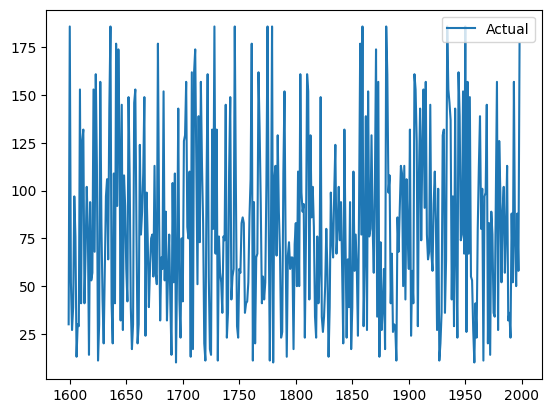

In [33]:
# Visualization (assuming you want to visualize predictions)
plt.plot(test_data.index, test_data['Food_Serving_ID'], label='Actual')
plt.legend()
plt.show()

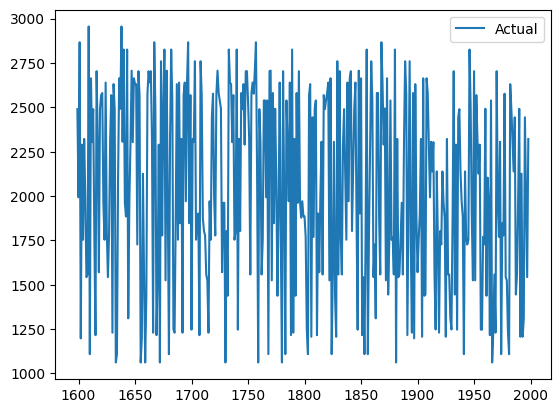

In [36]:
# Visualization (assuming you want to visualize predictions)
plt.plot(test_data.index, test_data['Food_type_id'], label='Actual')
plt.legend()
plt.show()

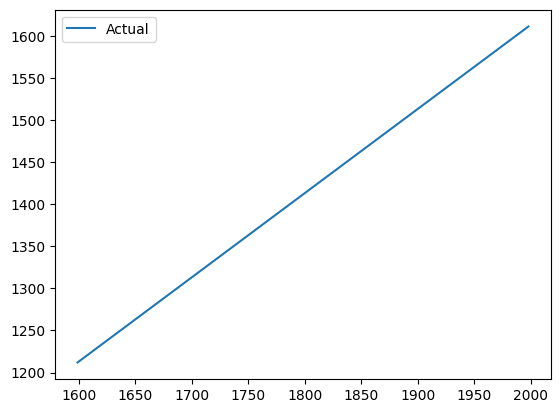

In [38]:
# Visualization (assuming you want to visualize predictions)
plt.plot(test_data.index, test_data['Family Count'], label='Actual')
plt.legend()
plt.show()